<a href="https://colab.research.google.com/github/ruchiraravishankar/level-5-project/blob/main/iam_dataset_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import torch
import glob
import os

from bs4 import BeautifulSoup
# data_path = '/Users/ruchiraravishankar/Downloads/iam_dataset/'
data_path = '/content/drive/MyDrive/iam_dataset/'

# print(glob.glob(data_path))

In [ ]:
# path = '/Users/ruchiraravishankar/Downloads/iam_dataset/xml/*'
# path = data_path + 'xml/*'
# xml_path = glob.glob(path)
# print(len(xml_path))

In [ ]:
# # for file in xml_path:
# # file = xml_path[0]
# # print(file)
# d = {}
# d_i = {}
# def get_form_metadata(file):
#     with open(file, 'r') as f:
#         data = f.read()
#     Bs_data = BeautifulSoup(data, "lxml")
#     form = Bs_data.find('form')
#     form_id = form.get('id')
#     writer_id = form.get('writer-id')
# #     print(form_id)
# #     print(writer_id)
#     d[writer_id] = form_id
#     d_i[form_id] = writer_id
# for file in xml_path:
#     get_form_metadata(file)
    
# print(d)
# print(d_i)


In [ ]:
import pickle
# a_file = open("/content/drive/MyDrive/iam_dataset/d.pkl", "wb")
# pickle.dump(d, a_file)
# a_file.close()

# b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "wb")
# pickle.dump(d_i, b_file)
# b_file.close()

In [ ]:
print(os.listdir(os.curdir))

['.config', 'model.pt', 'drive', 'sample_data']


In [ ]:

# a_file = open("/content/drive/MyDrive/iam_dataset/d.pkl", "rb")
# d = pickle.load(a_file)
# print(d)

b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-062': '213', 'e01-059': '213', 'e01-086': '214', 'e01-092': '215', 'e01-102': '215', 'e01-113': '216', 'e01-107': '216', 'e02-014': '219', 'e01-119': '217', 'e02-000': '218', 'e02-018': '220', 'e02-021': '221', 'e02-025': '222', 'e02-074': '223', 'e02-082': '224', 'e02-086': '225', 'e02-091': '226', 'e02-094': '227', 'e02-100': '228', 'e02-117': '229', 'e04-000': '158', 'e04-008': '230', 'e04-011': '231', 'e04-004': '230', 'e04-015': '231', 'e04-022': '232', 'e04-019': '232', 'e04-026': '233', 'e04-030': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-058': '236', 'e04-062': '237', 'e04-079': '238', 'e04-068': '237', 'e04-083': '239', 'e04-086': '240', 'e04-091': '241', 'e04-095': '241', 'e04-109': '242', 'e04-103': '242', 'e04-099': '241', 'e04-114': '242', 'e04-119': '243', 'e04-124': '243', 'e04-127': '243', 'e04-132': '241', 'e06-000': '206', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [ ]:
form_writer_list = list(d_i.items())

In [ ]:
from collections import Counter

top_writers = []
num_writers = 50 # taking the top 50 writers
writers_counter = Counter(d_i.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

print(top_writers)

['000', '384', '551', '552', '588', '635', '670', '671', '152', '150', '151', '154', '153', '333', '334', '336', '337', '338', '339', '340', '341', '342', '343', '345', '344', '347', '346', '348', '349', '634', '155', '332', '335', '315', '118', '415', '209', '085', '567', '206', '202', '204', '203', '205', '207', '208', '247', '248', '273', '274']


In [ ]:
top_forms = []
for form_id, author_id in d_i.items():
    if author_id in top_writers:
        top_forms.append(form_id)
print(top_forms)

['e06-000', 'e06-006', 'e06-003', 'e06-021', 'e06-010', 'e06-015', 'e06-030', 'e06-026', 'e06-033', 'e06-037', 'e06-046', 'e06-041', 'e06-053', 'e06-049', 'e07-000', 'e06-070', 'e07-079', 'e07-076', 'e07-086', 'e07-083', 'e07-090', 'e07-094', 'e07-105', 'e07-098', 'e07-101', 'e07-108', 'f04-007', 'f04-020', 'g03-049', 'g04-007', 'g04-011', 'g04-014', 'g04-017', 'g04-026', 'g04-032', 'g04-095', 'g06-011a', 'g05-098', 'g06-011b', 'g06-011c', 'g06-011e', 'g06-011f', 'g06-011g', 'g06-011h', 'g06-011i', 'g06-011j', 'g06-011k', 'g06-011l', 'g06-011n', 'g06-011m', 'g06-011p', 'g06-011o', 'g06-018a', 'g06-011r', 'g06-018c', 'g06-018d', 'g06-018b', 'g06-018g', 'g06-018f', 'g06-018e', 'g06-018h', 'g06-018i', 'g06-018l', 'g06-018j', 'g06-018k', 'g06-018n', 'g06-018m', 'g06-018o', 'g06-018p', 'g06-018r', 'g06-026b', 'g06-026a', 'g06-026e', 'g06-026d', 'g06-026c', 'g06-026g', 'g06-026f', 'g06-026i', 'g06-026h', 'g06-026j', 'g06-026l', 'g06-026k', 'g06-026o', 'g06-026m', 'g06-026n', 'g06-026r', 'g06

In [ ]:
# for key, value in sorted(top_forms.items()):
#     print(key, len([item for item in value if item])) 

In [ ]:
import os
import glob
import shutil

# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = data_path + "/temp_sentences"
if not os.path.exists(temp_sentences_path):
    os.makedirs(temp_sentences_path)
    # Copy forms that belong to the top 50 most common writers to the temp directory
    original_sentences_path = data_path + "/sentences/**/**/*.png"
    for file_path in glob.glob(original_sentences_path):
        image_name = file_path.split('/')[-1]  
        file_name, _ = os.path.splitext(image_name)
        form_id = '-'.join(file_name.split('-')[0:2])
        if form_id in top_forms:
            shutil.copy2(file_path, temp_sentences_path + "/" + image_name)

In [ ]:
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])
#             sentence_dict[d_i[form_id]] = form_id

[]
[]


In [ ]:
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000'])
dict_values([129, 127, 87, 73, 133, 134, 95, 116, 129, 83, 91, 101, 95, 81, 99, 107, 105, 86, 87, 82, 104, 89, 71, 82, 75, 80, 84, 45, 52, 117, 87, 60, 54, 45, 104, 99, 101, 111, 108, 95, 63, 43, 60, 55, 50, 56, 53, 71, 54, 693])


In [ ]:
sen_dict = {}

for i in range(len(img_targets)):
    if img_targets[i] not in sen_dict.keys():
        sen_dict[img_targets[i]] = [img_files[i]]
    else:
        sen_dict[img_targets[i]].append(img_files[i])

In [ ]:
print(len(sen_dict['207']))

56


In [ ]:
# print(len(sen_dict.values()))
number_of = []
writer_ids = []
for key, value in sorted(sen_dict.items()):
    writer_ids.append(key)
    number_of.append(len([item for item in value if item]))
print(len(writer_ids))

50


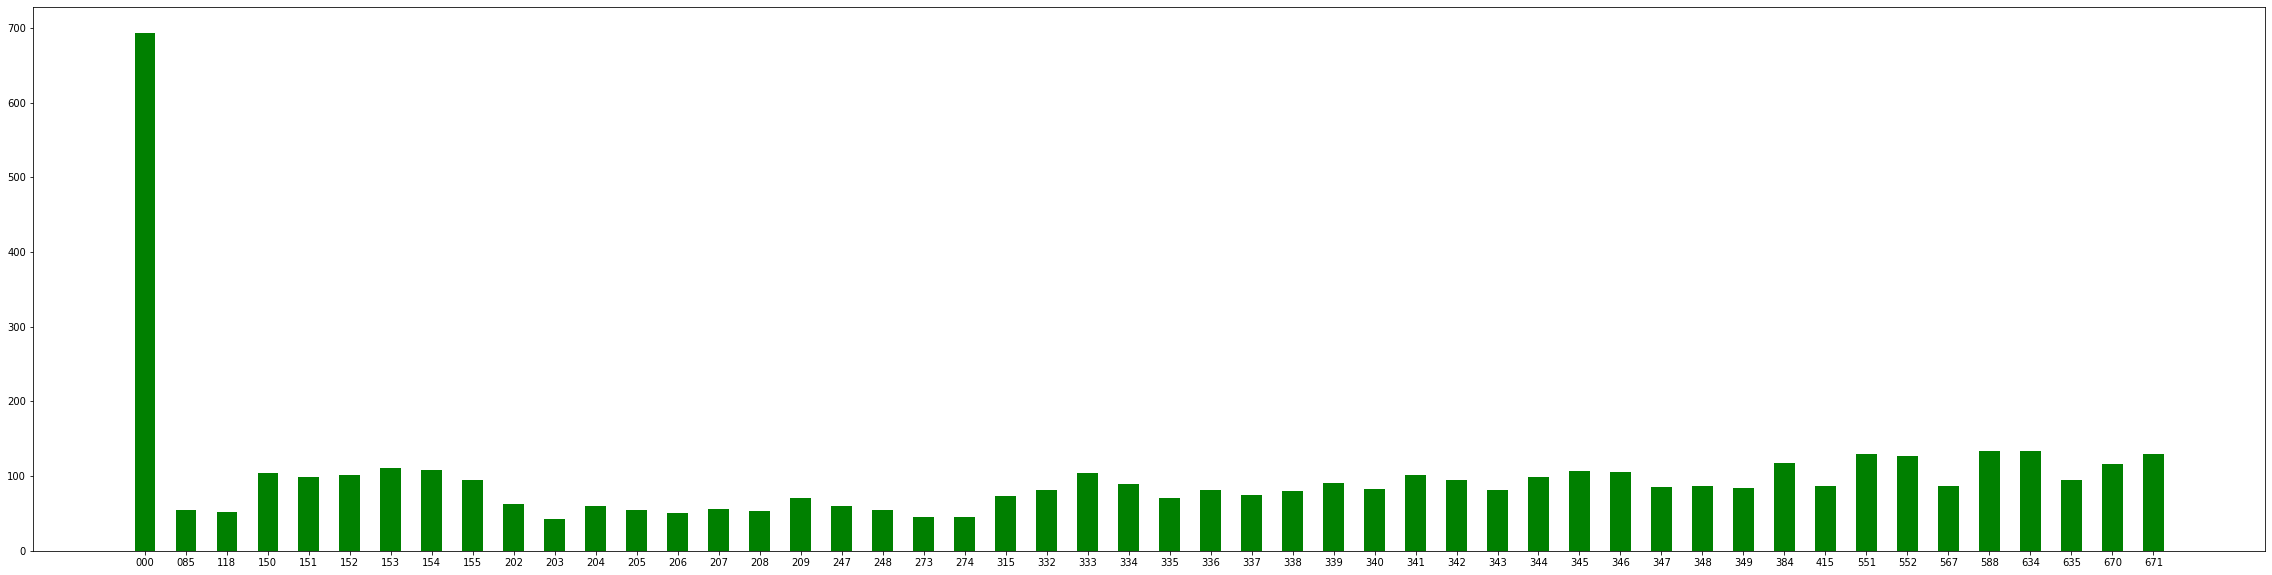

In [ ]:
# crop so all images are of same size
# plot histogram 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(40,10))
plt.bar(writer_ids, number_of, width=0.5, color='g')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline
# # img_files, img_targets
# img_shape_list = []
# for file_name in img_files:
#     img = mpimg.imread(file_name)
#     img_shape_list.append(img.shape)
#     plt.figure(figsize = (10,10))
#     plt.imshow(img, cmap ='gray')

In [ ]:
# print(img_shape_list)

In [ ]:
# arr = np.array(img_shape_list)
# print(arr.shape)

In [ ]:
# print(arr.min(axis=0))

(47, 95)
(80, 1203)


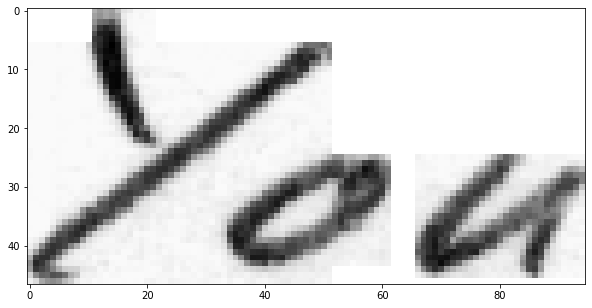

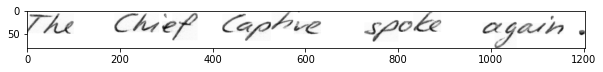

In [ ]:
for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')
    print(img.shape)

In [ ]:
# build a binary classifier on the writer id 000 and train on 0 and 1
# do the images have to be the same size???
# train test split => equal number of 0s and 1s (500 and 500)
# 1000 data points -> 900 to train and 100 to test

In [ ]:
writer_0_files = np.array(sen_dict['000'][:500])
print(writer_0_files.shape)

writer_0 = np.c_[writer_0_files, np.zeros(500)]

print(writer_0.shape)

(500,)
(500, 2)


In [ ]:
print(writer_0[0])

['/content/drive/MyDrive/iam_dataset//temp_sentences/a01-000u-s00-02.png'
 '0.0']


In [ ]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [ ]:
from sklearn.utils import shuffle
from PIL import Image
import random

CROP_SIZE = 113
NUM_LABELS = 50

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return images, labels

In [ ]:
transformed, labels = get_augmented_sample(labelled_data[0,0], labelled_data[0,1],0.05)

In [ ]:
print(len(transformed))

5


In [ ]:
labelled_data_0 = labelled_data[labelled_data[:,1] == '000']

print(labelled_data_0.shape)

labelled_data_0 = labelled_data_0[:196]
print(labelled_data_0.shape)

print(np.unique(labelled_data_0[:,1]))

(693, 2)
(196, 2)
['000']


In [ ]:
remove_000 = labelled_data[labelled_data[:,1]!='000']

print(np.unique(remove_000[:,1]))
print(np.unique(remove_000[:,1]).shape)

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']
(49,)


In [ ]:
y = [remove_000[remove_000[:,1]==k] for k in np.unique(remove_000[:,1])]
print(len(y))

49


In [ ]:
labelled_data_1 = []
for i in y:
    labelled_data_1.append(i[:4])
print(len(labelled_data_1))

labelled_data_1 = np.array(labelled_data_1)

print(labelled_data_1.shape)

49
(49, 4, 2)


In [ ]:
labelled_data_1=labelled_data_1.reshape(-1,2)

In [ ]:
print(labelled_data_1.shape)

(196, 2)


In [ ]:
print(np.unique(labelled_data_1[:,1]))

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']


In [ ]:
labelled_data_new = np.concatenate((labelled_data_0, labelled_data_1))
np.random.shuffle(labelled_data_new)
print(labelled_data_new.shape) # mix of sentences from writer id 0 and others, labelled

(392, 2)


In [ ]:
# split before augmenting to ensure the sentences are being split and not the augmented samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labelled_data_new[:,0], labelled_data_new[:,1], test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(175,) (130,) (87,) (175,) (130,) (87,)


In [ ]:
def augment(data, labels):
    augmented_sample_list = []
    augmented_label_list = []
    for i in range(len(data)):
        augmented_samples, augmented_labels = get_augmented_sample(data[i], labels[i],0.1)
        augmented_sample_list.append(augmented_samples)
        augmented_label_list.append(augmented_labels)
    return augmented_sample_list, augmented_label_list

In [ ]:
augsamps, auglbls = augment(X_train, y_train) # returns two lists of arrays
augsamps_test, auglbls_test = augment(X_test, y_test)
augsamps_val, auglbls_val = augment(X_val, y_val)

In [ ]:
import operator
from functools import reduce

# flattening the lists
aug_samps = reduce(operator.add, augsamps)
aug_lbls = reduce(operator.add, auglbls)

aug_samps_test = reduce(operator.add, augsamps_test)
aug_lbls_test = reduce(operator.add, auglbls_test)

aug_samps_val = reduce(operator.add, augsamps_val)
aug_lbls_val = reduce(operator.add, auglbls_val)

print(len(aug_samps))
print(len(aug_lbls))

print(len(aug_samps_test))
print(len(aug_lbls_test))

print(len(aug_samps_val))
print(len(aug_lbls_val))

27499
27499
19816
19816
12667
12667


In [ ]:
# converting lists to arrays
aug_samps_arr = np.array(aug_samps)
aug_lbls_arr = np.array(aug_lbls)
aug_samps_arr_test = np.array(aug_samps_test)
aug_lbls_arr_test = np.array(aug_lbls_test)
aug_samps_arr_val = np.array(aug_samps_val)
aug_lbls_arr_val = np.array(aug_lbls_val)

print(aug_samps_arr.shape)
print(aug_lbls_arr.shape)
print(aug_samps_arr_test.shape)
print(aug_lbls_arr_test.shape)
print(aug_samps_arr_val.shape)
print(aug_lbls_arr_val.shape)

(27499, 113, 113)
(27499,)
(19816, 113, 113)
(19816,)
(12667, 113, 113)
(12667,)


In [ ]:
X_train = aug_samps_arr
X_train = X_train.reshape(X_train.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_train = X_train.astype('float16')
X_train /= 255.0
y_train = aug_lbls_arr


X_test = aug_samps_arr_test
X_test = X_test.reshape(X_test.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_test = X_test.astype('float16')
X_test /= 255.0
y_test = aug_lbls_arr_test

X_val = aug_samps_arr_val
X_val = X_val.reshape(X_val.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_val = X_val.astype('float16')
X_val /= 255.0
y_val = aug_lbls_arr_val



In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(27499, 1, 113, 113)
(27499,)
(19816, 1, 113, 113)
(19816,)
(12667, 1, 113, 113)
(12667,)


In [ ]:
new = np.unique(y_train)
print(new)

y_train[y_train !='000'] = 1
new = np.unique(y_train)
print(new)

y_train[y_train=='000'] = 0
new = np.unique(y_train)
print(new)

print(y_train.shape)

y_train = y_train.astype('float16')

print(np.unique(y_train))

['000' '085' '118' '150' '152' '153' '155' '202' '203' '204' '205' '206'
 '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334' '335'
 '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346' '347'
 '348' '349' '384' '415' '551' '552' '567' '588' '670' '671']
['000' '1']
['0' '1']
(27499,)
[0. 1.]


In [ ]:
new = np.unique(y_test)
print(new)

y_test[y_test !='000'] = 1
new = np.unique(y_test)
print(new)

y_test[y_test=='000'] = 0
new = np.unique(y_test)
print(new)

print(y_test.shape)

y_test = y_test.astype('float16')

print(np.unique(y_test))

['000' '085' '118' '150' '151' '152' '153' '154' '155' '204' '205' '207'
 '208' '247' '248' '273' '315' '332' '333' '334' '335' '336' '337' '338'
 '339' '341' '342' '343' '344' '345' '347' '348' '349' '384' '551' '552'
 '567' '588' '634' '635']
['000' '1']
['0' '1']
(19816,)
[0. 1.]


In [ ]:
new = np.unique(y_val)
print(new)

y_val[y_val !='000'] = 1
new = np.unique(y_val)
print(new)

y_val[y_val=='000'] = 0
new = np.unique(y_val)
print(new)

print(y_val.shape)

y_val = y_val.astype('float16')

print(np.unique(y_val))

['000' '085' '150' '151' '154' '202' '204' '205' '206' '208' '209' '247'
 '274' '332' '333' '334' '335' '339' '340' '341' '342' '343' '345' '346'
 '347' '348' '384' '415' '551' '567' '588' '634' '635' '670' '671']
['000' '1']
['0' '1']
(12667,)
[0. 1.]


In [ ]:
torch.manual_seed(42)
CUDA = True
device = torch.device('cuda' if CUDA else 'cpu')
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
device

device(type='cuda')

In [ ]:
from torch.utils.data import TensorDataset, DataLoader


tensor_x_train = torch.Tensor(X_train).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_train = torch.Tensor(y_train).type(torch.cuda.FloatTensor).long()



# tensor_x_train = torch.Tensor(X_train) # transform to torch tensor
# tensor_y_train = torch.Tensor(y_train).long()

train_dataset = TensorDataset(tensor_x_train,tensor_y_train) # create your datset
train_dataloader = DataLoader(train_dataset,batch_size=32, shuffle=True, drop_last=True) # create your dataloader

In [ ]:
tensor_x_val = torch.Tensor(X_val).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_val = torch.Tensor(y_val).type(torch.cuda.FloatTensor).long()
# tensor_x_train = torch.Tensor(X_train) # transform to torch tensor
# tensor_y_train = torch.Tensor(y_train).long()

val_dataset = TensorDataset(tensor_x_val,tensor_y_val) # create your datset
val_dataloader = DataLoader(val_dataset,batch_size=16, shuffle=True, drop_last=True) # create your dataloader

In [ ]:
tensor_x_test = torch.Tensor(X_test).type(torch.cuda.FloatTensor) # transform to torch tensor
tensor_y_test = torch.Tensor(y_test).long().type(torch.cuda.FloatTensor).long()

# tensor_x_test = torch.Tensor(X_test) # transform to torch tensor
# tensor_y_test = torch.Tensor(y_test).long()

test_dataset = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, drop_last=True) # create your dataloader

In [ ]:
tensor_x_train.shape

torch.Size([27499, 1, 113, 113])

In [ ]:
import torch
from torch import nn
class Binary_Classifier(nn.Module): 
    def __init__(self):
        super(Binary_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(13520, 1024)
        self.fc2 = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(2)
    def forward(self, x):
        x = self.relu(self.max_pool2d(self.conv1(x)))
        x = self.relu(self.max_pool2d(self.conv2_drop(self.conv2(x))))
        x = x.view(x.shape[0],-1)
        # print(x.shape)
        x = self.relu(self.fc1(x))
        x = self.conv2_drop(x)
        x = self.fc2(x)
        return x

In [ ]:
model=Binary_Classifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)

# import torch.optim.lr_scheduler.StepLR
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)


In [ ]:
# train_losses = []
train_loss_record = []
valid_loss_record = []
save_path = "/content/drive/MyDrive/iam_dataset/saved_model"

In [ ]:
from datetime import datetime
train_log_string = '%s :: Epoch %i :: Iter %i / %i :: train loss: %0.4f'
valid_log_string = '%s :: Epoch %i :: valid loss: %0.4f\n'
def train(epoch, best_record, criterion, optimizer):
    print('Start Epoch {} Training...'.format(epoch))
    model.train()
    train_loss = []
    train_loss_sum = []
    for idx, (data, target) in enumerate(train_dataloader):
        if torch.cuda.is_available():
          data, target = data.cuda(), target.cuda()   
        optimizer.zero_grad()
        #  forward-pass
        output = model(data)
        loss = criterion(output, target)
        #backward-pass
        loss.backward()
        # Update lr scheduler
        # scheduler.step()
        # Update the parameters
        optimizer.step()

        train_loss.append(loss.item())
        train_loss_sum.append(loss.item())
        if ((idx +1) % 64) == 0:
          print(train_log_string % (datetime.now(), epoch, idx + 1, len(train_dataloader), np.mean(train_loss)))
          print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))
          train_loss = []
    # mean_tr = torch.mean(torch.stack(train_loss_sum))
    mean_tr = np.mean(np.array(train_loss_sum))
    print('Train Loss at epoch {}: {}\n'.format(epoch, mean_tr))
    train_loss_record.append(mean_tr)


    print('Epoch {} Validating...'.format(epoch))

    
    valid_loss = []
    
    for idx, (data, target) in enumerate(val_dataloader):
        output = model(data)
        output = output.squeeze(1)
        loss = criterion(output, target)
        valid_loss.append(loss.item())
        # mean_val = torch.mean(torch.stack(valid_loss))
        mean_val = np.mean(np.array(valid_loss))
        print(valid_log_string % (datetime.now(), epoch, mean_val))
        valid_loss_record.append(mean_val)
    # if torch.mean(torch.stack(valid_loss)) < best_record:
    if np.mean(np.array(valid_loss)) < best_record:
        # best_record = torch.mean(torch.stack(valid_loss))
        best_record = np.mean(np.array(valid_loss))
        # save the best model
        state_dict = {
            'epoch': epoch,
            'model': model.state_dict(),
            'optimizer': optimizer.state_dict(),
        }
        torch.save(state_dict, save_path+'/model.pt')
        print('Model saved!\n')
        
    print("DONE!")
    return train_loss_record, valid_loss_record, best_record

In [ ]:
best = np.inf
for epoch in range(15):
    tlr, vlr, best = train(epoch, best, criterion, optimizer)

Start Epoch 0 Training...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Streaming output truncated to the last 5000 lines.
2021-11-10 12:42:11.474252 :: Epoch 11 :: valid loss: 0.1979

2021-11-10 12:42:11.477810 :: Epoch 11 :: valid loss: 0.1979

2021-11-10 12:42:11.481297 :: Epoch 11 :: valid loss: 0.1980

2021-11-10 12:42:11.484797 :: Epoch 11 :: valid loss: 0.1978

2021-11-10 12:42:11.488351 :: Epoch 11 :: valid loss: 0.1977

2021-11-10 12:42:11.491887 :: Epoch 11 :: valid loss: 0.1980

2021-11-10 12:42:11.495456 :: Epoch 11 :: valid loss: 0.1981

2021-11-10 12:42:11.498956 :: Epoch 11 :: valid loss: 0.1982

2021-11-10 12:42:11.502499 :: Epoch 11 :: valid loss: 0.1985

2021-11-10 12:42:11.505948 :: Epoch 11 :: valid loss: 0.1987

2021-11-10 12:42:11.509497 :: Epoch 11 :: valid loss: 0.1988

2021-11-10 12:42:11.513015 :: Epoch 11 :: valid loss: 0.1990

2021-11-10 12:42:11.516595 :: Epoch 11 :: valid loss: 0.1989

2021-11-10 12:42:11.520192 :: Epoch 11 :: valid loss: 0.1990

2021-11-10 12:42:11.523754 :: Epoch 11 :: valid loss: 0.1990

2021-11-10 12:42:11

In [ ]:
# # save trained model
# state_dict = {
#     # 'epoch': epoch,
#     'model': model.state_dict(),
#     'optimizer': optimizer.state_dict(),
# }
# torch.save(state_dict, '/content/drive/MyDrive/iam_dataset/saved_model/model.pt')

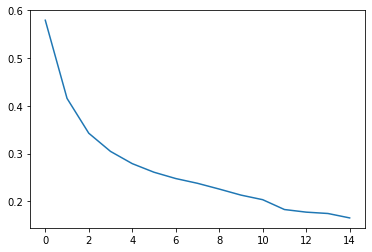

In [ ]:
# temp = [t.detach().cpu().numpy() for t in tlr]
# arr = np.array(temp)
# print(arr.shape)

plt.plot(tlr)

In [ ]:
import os

if os.path.exists(save_path +'/model.pt'):
    print('Loading checkpoint: %s' %save_path +'/model.pt')
    path = torch.load(save_path +'/model.pt')
    epoch = path['epoch']
    model.load_state_dict(path['model'])
    optimizer.load_state_dict(path['optimizer'])
else:
  print("DID NOT DO ANYTHING")

Loading checkpoint: /content/drive/MyDrive/iam_dataset/saved_model/model.pt


In [ ]:
# print("Model's state_dict:")
# for param_tensor in model.state_dict():
#     print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# print()

In [ ]:
# print(path['model'])

In [ ]:
result = []
prediction = []
model.eval()
with torch.no_grad():
    for idx, (data, target) in enumerate(test_dataloader):
        output = model(data)
        output_sm = nn.Softmax(dim=1)(output)
        _, predicted = torch.max(output, 1)
        prediction.append(predicted)
        result.append(output_sm)
        
result = torch.stack(result).detach().cpu().numpy()
prediction = torch.stack(prediction).detach().cpu().numpy()

print(result.shape, prediction.shape)

(1238, 16, 2) (1238, 16)


In [ ]:
print(prediction.reshape(-1).shape)

(19808,)


In [ ]:
import pandas as pd
res = pd.DataFrame(result.reshape(-1,2))
pred = pd.DataFrame(prediction.reshape(-1))

res.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/results.csv", header=False, index=False)
pred.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/pred.csv", header=False, index=False)

In [ ]:
print(res.shape, pred.shape)

(19808, 2) (19808, 1)


In [ ]:
y_test_new = y_test[:result.reshape(-1,2).shape[0]]

In [ ]:
print(y_test_new.shape)

(19808,)


In [ ]:
result_df = pd.DataFrame({'ground truth': y_test_new, 'NN output': prediction.reshape(-1), 'probs 0': res[0], 'probs 1': res[1]})
result_df

,ground truth,NN output,probs 0,probs 1
0,0.0,0,0.997634,0.002366
1,0.0,0,0.999567,0.000433
2,0.0,0,0.991956,0.008044
3,0.0,0,0.981187,0.018813
4,0.0,0,0.999815,0.000185
...,...,...,...,...
19803,1.0,1,0.323324,0.676676
19804,1.0,1,0.306553,0.693447
19805,1.0,1,0.223506,0.776494
19806,1.0,1,0.063439,0.936561


In [ ]:
print(result_df)
result_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/result_df.csv")

       ground truth  NN output   probs 0   probs 1
0               0.0          0  0.997634  0.002366
1               0.0          0  0.999567  0.000433
2               0.0          0  0.991956  0.008044
3               0.0          0  0.981187  0.018813
4               0.0          0  0.999815  0.000185
...             ...        ...       ...       ...
19803           1.0          1  0.323324  0.676676
19804           1.0          1  0.306553  0.693447
19805           1.0          1  0.223506  0.776494
19806           1.0          1  0.063439  0.936561
19807           1.0          1  0.202362  0.797638

[19808 rows x 4 columns]


In [ ]:
# work out the accuracy and other metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = result_df['ground truth']
predicted = result_df['NN output']
# confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix_2 = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[11954    90]
 [  816  6948]]
Outcome values : 
 11954 90 816 6948
Classification report : 
 [[11954    90]
 [  816  6948]]


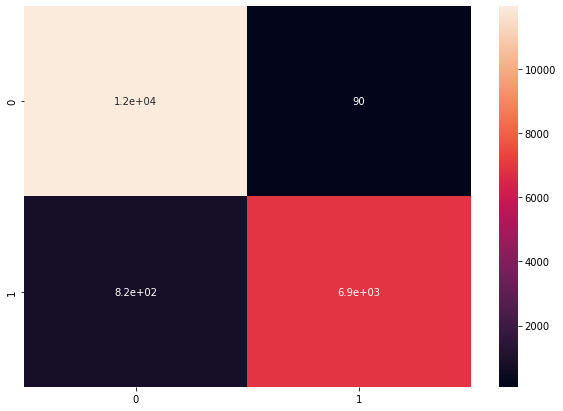

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
matrix = classification_report(actual,predicted,labels=[0,1], output_dict=True)
print('Classification report : \n',matrix)
accuracy_score(actual, predicted)

Classification report : 
 {'0': {'precision': 0.9361002349256069, 'recall': 0.9925273995350382, 'f1-score': 0.963488353348916, 'support': 12044}, '1': {'precision': 0.9872122762148338, 'recall': 0.8948995363214838, 'f1-score': 0.9387920551276855, 'support': 7764}, 'accuracy': 0.9542609046849758, 'macro avg': {'precision': 0.9616562555702204, 'recall': 0.943713467928261, 'f1-score': 0.9511402042383008, 'support': 19808}, 'weighted avg': {'precision': 0.9561342559559762, 'recall': 0.9542609046849758, 'f1-score': 0.9538083220792456, 'support': 19808}}


0.9542609046849758

In [ ]:
matrix_df = pd.DataFrame(matrix).transpose()

matrix_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.csv", header=False, index=False)

# pd.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.txt",matrix)
